In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
'''
true roots
'''
x=sym.symbols('x')
r1=-0.8
r2=0.2
r3=0.8
y=(x-r1)*(x-r2)*(x-r3)
z=sym.expand(y.simplify())
z

x**3 - 0.2*x**2 - 0.64*x + 0.128

In [3]:
'''
true values of W parameter
'''
a=(z.coeff(x**3))
b=(z.coeff(x**2))
c=(z.coeff(x))
d=z.coeff(x,n=0)
w=np.array([a,b,c,d])
w=np.array((w.reshape(-1,1)),dtype=float)
w

array([[ 1.   ],
       [-0.2  ],
       [-0.64 ],
       [ 0.128]])

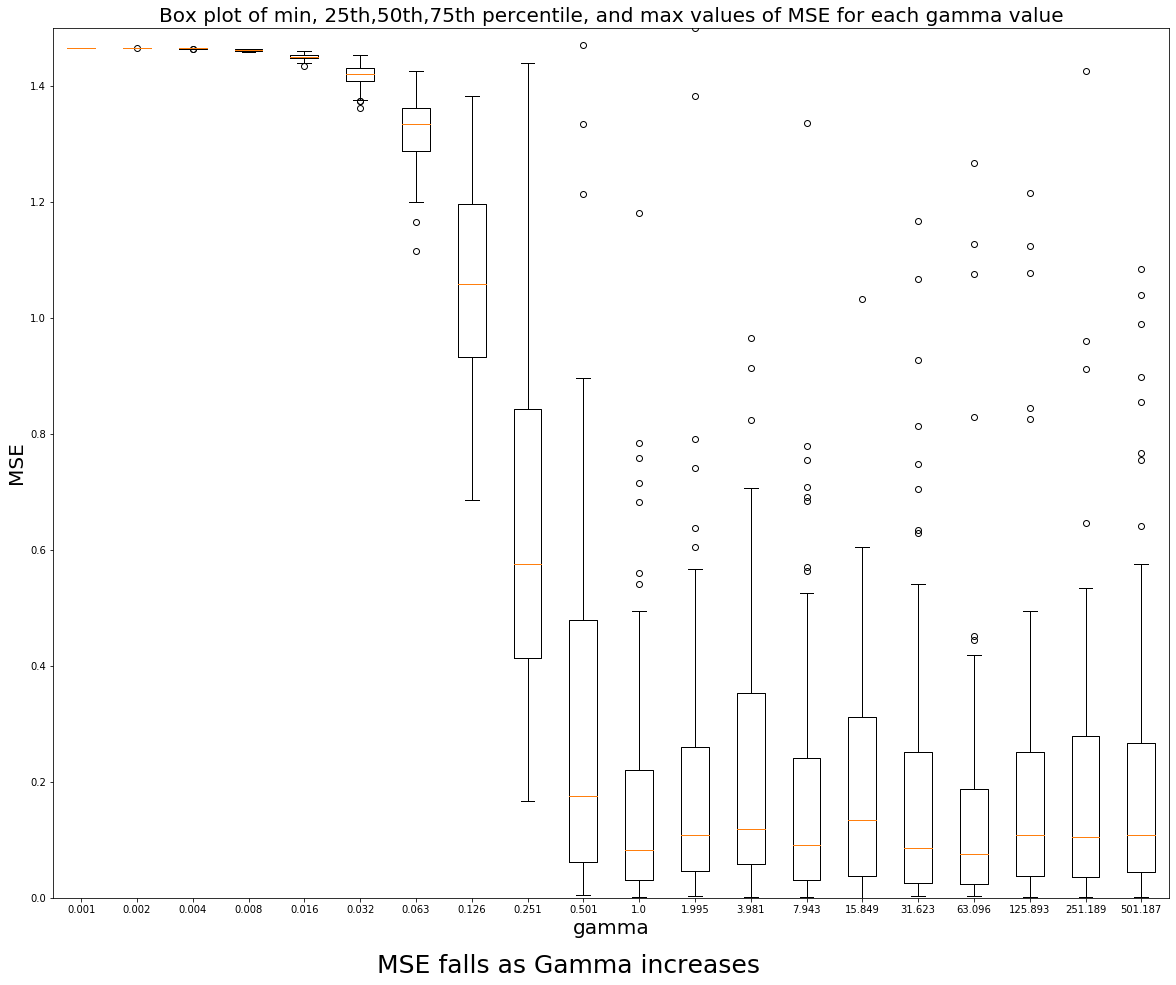

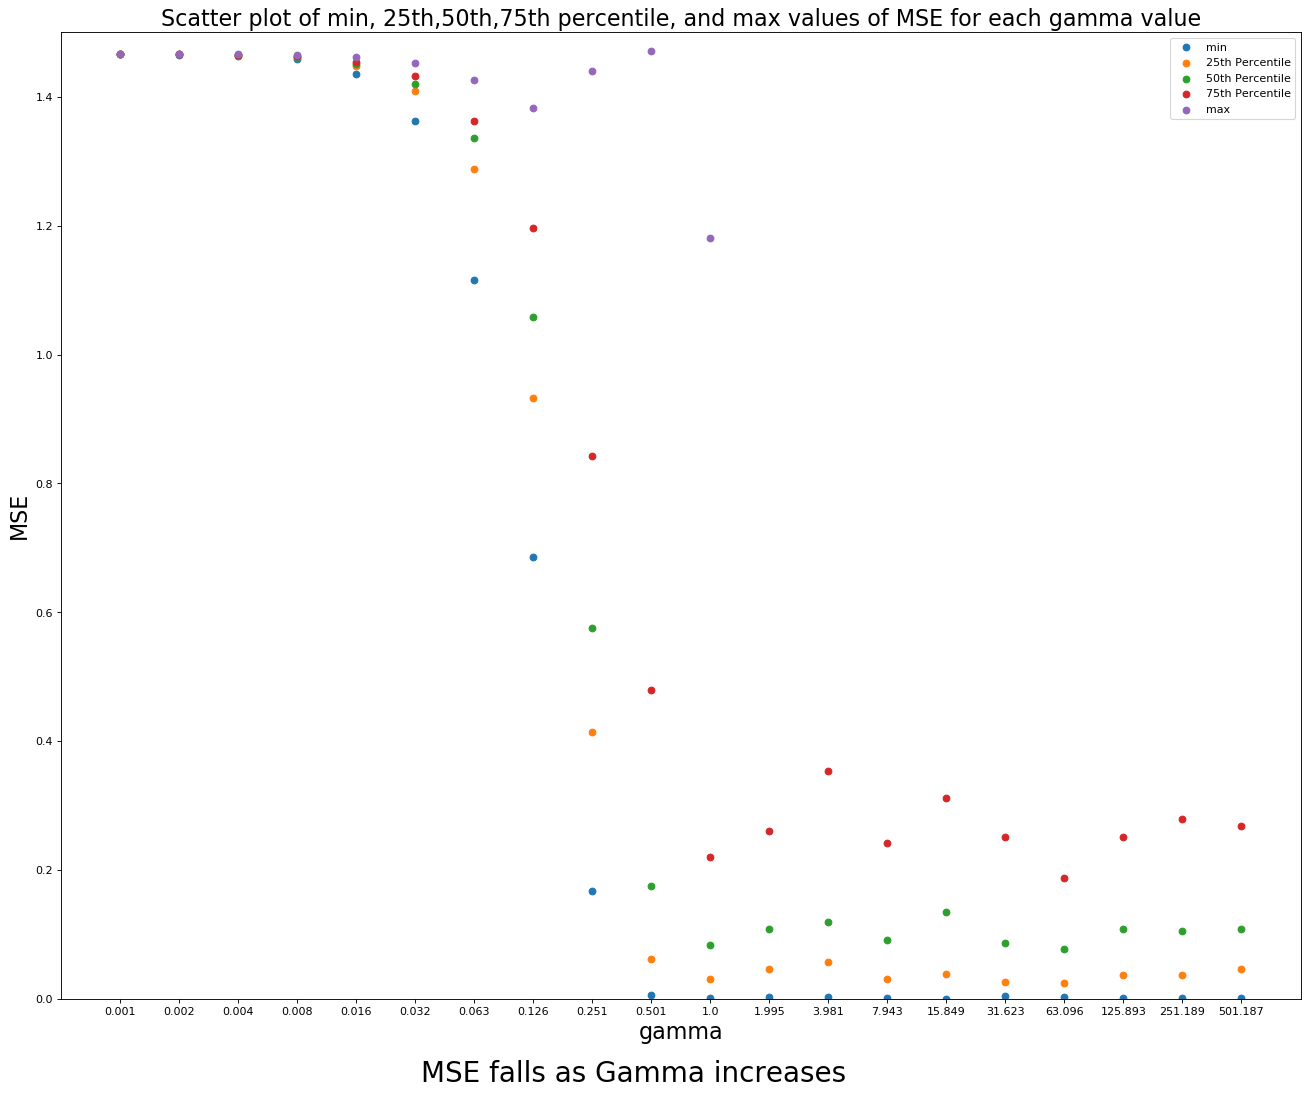

In [225]:
'''
X_stack.shape=(samples,4)
'''

num_samples=10
result={}
sigma=.1 # (Standard deviation of noise) (.01 seems decent) # fixed
gamma_low=-3
gamma_high=3
num_points=20
for gamma in np.logspace(gamma_low,gamma_high,num=num_points, endpoint=False):
    result[gamma]=[]
    for i in range(100):
        Y=[]
        X=[]
        for i in range(num_samples):
            x=np.random.uniform(-1,1)
            y=w[0]*x**3+w[1]*x**2+w[2]*x**1+w[3]*x**0+np.random.normal(scale=sigma)
            Y.append(y)
            X.append(x)
        Y=np.array(np.array(Y).reshape(-1,1),dtype=float)
        X=np.array(X).reshape(-1,1)
        X_stack=np.hstack([X**3,X**2,X**1,X**0])
        C=np.matmul((X_stack.T),X_stack)+((sigma**2)/(gamma**2))*np.identity(4)
        A=np.linalg.inv(C)
        B=np.matmul(X_stack.T,Y)
        w_map=np.matmul(A,B)
        result[gamma].append(np.sum(np.square(w_map-w)))
label=[]
result_plot=[]
for gamma in np.logspace(gamma_low,gamma_high,num=num_points, endpoint=False):
    label.append(np.round(gamma,3))
    result_plot.append(result[gamma])
fig1, ax1 = plt.subplots(figsize=(20,16))
from matplotlib.pyplot import figure
plt.ylim(0,1.5)
fig1.text(.35,0.06,'MSE falls as Gamma increases',fontsize=25);
plt.title('Box plot of min, 25th,50th,75th percentile, and max values of MSE for each gamma value',fontsize=20)
plt.ylabel('MSE',fontsize=20)
plt.xlabel('gamma',fontsize=20)
ax1.boxplot(result_plot,labels=label);

plt.show()
print ("\n\n\n")
from matplotlib.pyplot import figure
fig=figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
X=[]
for gamma in np.logspace(gamma_low,gamma_high,num=num_points, endpoint=False):
    X.append(str(np.round(gamma,3)))

result_min=[]
for gamma in np.logspace(gamma_low,gamma_high,num=num_points, endpoint=False):
    result_min.append((np.array(result[gamma])).min())

result_max=[]
for gamma in np.logspace(gamma_low,gamma_high,num=num_points, endpoint=False):
    result_max.append((np.array(result[gamma])).max())
    
result_25=[]
for gamma in np.logspace(gamma_low,gamma_high,num=num_points, endpoint=False):
    result_25.append(np.percentile(np.array(result[gamma]),25))
result_50=[]
for gamma in np.logspace(gamma_low,gamma_high,num=num_points, endpoint=False):
    result_50.append(np.percentile(np.array(result[gamma]),50))
    
result_75=[]
for gamma in np.logspace(gamma_low,gamma_high,num=num_points, endpoint=False):
    result_75.append(np.percentile(np.array(result[gamma]),75))
plt.ylim(0,1.5)
plt.title('Scatter plot of min, 25th,50th,75th percentile, and max values of MSE for each gamma value',fontsize=20)
plt.scatter(X,result_min,label='min')
plt.scatter(X,result_25,label='25th Percentile')
plt.scatter(X,result_50,label='50th Percentile')
plt.scatter(X,result_75,label='75th Percentile')
plt.scatter(X,result_max,label='max')
plt.ylabel('MSE',fontsize=20)
plt.xlabel('gamma',fontsize=20)
fig.text(.35,0.06,'MSE falls as Gamma increases',fontsize=25);
plt.legend();


In [182]:
'''
ML estimate
'''

C=np.matmul((X_stack.T),X_stack)
A=np.linalg.inv(C)
B=np.matmul(X_stack.T,Y)
w_ml=np.matmul(A,B)
print ("W_ML is \n",w_ml)

print ("\n\nWith Gamma :",gamma,", W_MAP is \n",w_map)
print ("\nAs gamma increases, w_MAP indeed approaches to w_ml")

W_ML is 
 [[ 1.00279534]
 [-0.19552492]
 [-0.65031524]
 [ 0.13020576]]


With Gamma : 100000.0 , W_MAP is 
 [[ 1.00279534]
 [-0.19552492]
 [-0.65031524]
 [ 0.13020576]]

As gamma increases, w_MAP indeed approaches to w_ml
